
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## EDA:
- .info() ger att det saknas värden för horsepower för 6 st av totalt 398 värden.
- Det är bara 6 av 398 rader, lika bra att ta bort dessa rader. Eventuellt hade man också kunna gissa vilket värde det ska vara, tex baserat på displacement och antal cylindrar, för samma märke.

In [112]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Letar upp vilka bilar som saknar värde på 'horsepower':

In [113]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [114]:
mpg[mpg['name']=='ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.0,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.0,2451,16.5,74,usa,ford pinto
168,23.0,4,140.0,83.0,2639,17.0,75,usa,ford pinto
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford pinto
206,26.5,4,140.0,72.0,2565,13.6,76,usa,ford pinto


In [115]:
mpg[mpg['displacement']==98]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw)
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
141,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox
185,26.0,4,98.0,79.0,2255,17.7,76,usa,dodge colt
196,24.5,4,98.0,60.0,2164,22.1,76,usa,chevrolet woody
216,31.5,4,98.0,68.0,2045,18.5,77,japan,honda accord cvcc
237,30.5,4,98.0,63.0,2051,17.0,77,usa,chevrolet chevette
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta


Man skulle kunna gissa att Ford Pinto har 65 eller 66 hästkrafter, eftersom andra Ford bilar med displacement 98 har det. Men eftersom ford pinto är 1970 års modell och ford escort är 81 års modell så kanske det inte blir så bra.

In [116]:
mpg[mpg['name']=='ford maverick']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick


Liknande resonemang för Ford Maverick: vi kan inte gissa horsepower på ett bra sätt.

### förslag hur man skulle kunna gissa horsepower för det som saknas:
- Göra en multiple linjär regression, baserat på displacement och årtal tex.
- Men gör inte det nu.
- droppar de raderna där horsepower saknas.

In [117]:
mpg.dropna(axis='index', how='any', inplace=True)
mpg.reset_index(inplace=True)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
 9   name          392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB


## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

### Corr:
- Gör en korrelation mellan de olika variablerna i datasetet, mha Seaborn. Avsikten är att undersöka om det finns features som sinsemellan har starkt samband.
- Slutsatsen är att flera features har en hög korrelation sinsemellan.
- 'mpg' har korrelation mot 'cylinders', 'displacement', 'horsepower' och 'weight'. Men 'horsepower' har också hög korrelation mot 'cylinders', 'displacement' och 'weight'.
- 'mpg' verkar ha störst inverkan från 'weight', som i sin tur är starkt korrelerad mot 'horsepower', 'cylinders' och 'displacement'.
- dvs man skulle kunna prova att göra en simpel linjär regression av 'mpg' mot 'weight'.

<Axes: >

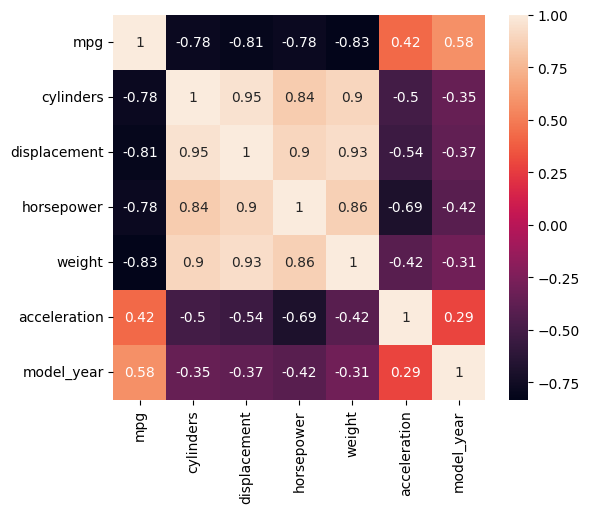

In [119]:
# skapar en datafram som kan användas för att kika på korrelation: tar bort index, name och origin
df_corr = mpg.drop(columns=['origin', 'name','index'])
corr = df_corr.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True)

[Länk till SciKit Learn train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)<br>
- Man ska ge funktionen X (feature matrisen) och y (target vektorn), så dessa måste definieras först.

In [125]:
#definierar X och y
X, y = mpg.drop(columns=['mpg','index','name', 'origin','acceleration','model_year']), mpg['mpg']
print(f'X columns: {X.columns}')
print(f'y name: {y.name}')

X columns: Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')
y name: mpg


In [126]:
# splittar datan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # observera ordningen på de tilldelade variablerna
#print(X_train.head())

for var in [X_train, X_test,y_train, y_test]:
    print(f'Shape: {var.shape}') #kontrollerar att shape för alla variabler är ok


Shape: (313, 4)
Shape: (79, 4)
Shape: (313,)
Shape: (79,)


In [127]:
X.head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130.0,3504
1,8,350.0,165.0,3693
2,8,318.0,150.0,3436
3,8,304.0,150.0,3433
4,8,302.0,140.0,3449


In [128]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[-3.93285431e-01  1.38893129e-04 -4.28124811e-02 -5.27717310e-03]
45.7567705221477


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---